In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()
uploaded1 = files.upload()

Saving AppleStore.csv to AppleStore.csv


Saving appleStore_description.csv to appleStore_description.csv


In [3]:
import io 
AppleStore = pd.read_csv(io.BytesIO(uploaded['AppleStore.csv']))
reviews = pd.read_csv(io.BytesIO(uploaded1['appleStore_description.csv']))

In [4]:
AppleStore.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
reviews.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [6]:
Store = pd.merge(AppleStore, reviews, on='id')
Store.head()

,Unnamed: 0,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_y,size_bytes_y,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,Bible,92774400,On more than 250 million devices around the wo...


In [7]:
Combine_AppleStore_df = Store.drop(columns=['track_name_y', 'size_bytes_y', 'rating_count_ver', 'user_rating_ver', 'vpp_lic', 'currency', 'cont_rating', 'ipadSc_urls.num'])
Combine_AppleStore_df.head()

,Unnamed: 0,id,track_name_x,size_bytes_x,price,rating_count_tot,user_rating,ver,prime_genre,sup_devices.num,lang.num,app_desc
0,1,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,6.3.5,Games,38,10,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,8.2.2,Productivity,37,23,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,5.0.0,Weather,37,3,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,5.10.0,Shopping,37,9,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,0.00,985920,4.5,7.5.1,Reference,37,45,On more than 250 million devices around the wo...


In [8]:
Combine_AppleStore_df = Combine_AppleStore_df.rename(columns = {'id': 'ID','track_name_x': 'TRACK NAME', 'size_bytes_x':'SIZE',
                                    'rating_count_tot':'TOTAL VOTES', 'user_rating':'RATING', 'ver':'VERSION', 'prime_genre': 'GENRE',  
                                    'sup_devices.num':'DEVICE SUPPORTED', 'lang.num':'LANGUAGE SUPPORTED', 'app_desc':'DESCRIPTION','price': 'PRICE'})
Combine_AppleStore_df.head()

,Unnamed: 0,ID,TRACK NAME,SIZE,PRICE,TOTAL VOTES,RATING,VERSION,GENRE,DEVICE SUPPORTED,LANGUAGE SUPPORTED,DESCRIPTION
0,1,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,6.3.5,Games,38,10,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,8.2.2,Productivity,37,23,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,5.0.0,Weather,37,3,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,5.10.0,Shopping,37,9,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,0.00,985920,4.5,7.5.1,Reference,37,45,On more than 250 million devices around the wo...


In [9]:
Combine_AppleStore_df.drop_duplicates

<bound method DataFrame.drop_duplicates of       Unnamed: 0  ...                                        DESCRIPTION
0              1  ...  SAVE 20%, now only $3.99 for a limited time!\n...
1              2  ...  Let Evernote change the way you organize your ...
2              3  ...  Download the most popular free weather app pow...
3              4  ...  The eBay app is the best way to find anything ...
4              5  ...  On more than 250 million devices around the wo...
...          ...  ...                                                ...
7192       11081  ...  Place the falling blocks correctly in order to...
7193       11082  ...  A thrilling virtual reality roller coaster exp...
7194       11087  ...  Rock star Bret Michaels, winner of Celebrity A...
7195       11089  ...  VR Roller Coaster World is an app for Google C...
7196       11097  ...  5 previous escape games plus 1 new game in one...

[7197 rows x 12 columns]>

In [10]:
Combine_AppleStore_df.shape

(7197, 12)

In [11]:
Combine_AppleStore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7197 non-null   int64  
 1   ID                  7197 non-null   int64  
 2   TRACK NAME          7197 non-null   object 
 3   SIZE                7197 non-null   int64  
 4   PRICE               7197 non-null   float64
 5   TOTAL VOTES         7197 non-null   int64  
 6   RATING              7197 non-null   float64
 7   VERSION             7197 non-null   object 
 8   GENRE               7197 non-null   object 
 9   DEVICE SUPPORTED    7197 non-null   int64  
 10  LANGUAGE SUPPORTED  7197 non-null   int64  
 11  DESCRIPTION         7197 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 730.9+ KB


DESCRIPTION

In [12]:
v=Combine_AppleStore_df['TOTAL VOTES']
R=Combine_AppleStore_df['RATING']
C=Combine_AppleStore_df['RATING'].mean()
m=Combine_AppleStore_df['TOTAL VOTES'].quantile(0.70)

In [13]:
Combine_AppleStore_df['WEIGHTED AVERAGE']=((R*v)+ (C*m))/(v+m)

In [14]:
Combine_AppleStore_df.head()

,Unnamed: 0,ID,TRACK NAME,SIZE,PRICE,TOTAL VOTES,RATING,VERSION,GENRE,DEVICE SUPPORTED,LANGUAGE SUPPORTED,DESCRIPTION,WEIGHTED AVERAGE
0,1,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,6.3.5,Games,38,10,"SAVE 20%, now only $3.99 for a limited time!\n...",3.964445
1,2,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,8.2.2,Productivity,37,23,Let Evernote change the way you organize your ...,3.994972
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,5.0.0,Weather,37,3,Download the most popular free weather app pow...,3.500245
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,5.10.0,Shopping,37,9,The eBay app is the best way to find anything ...,3.996899
4,5,282935706,Bible,92774400,0.00,985920,4.5,7.5.1,Reference,37,45,On more than 250 million devices around the wo...,4.498295


In [19]:
AppleStore_sorted_ranking=Combine_AppleStore_df.sort_values('WEIGHTED AVERAGE',ascending=False)
AppleStore_sorted_ranking[['TRACK NAME', 'TOTAL VOTES', 'RATING', 'WEIGHTED AVERAGE', 'PRICE']].head(20)

,TRACK NAME,TOTAL VOTES,RATING,WEIGHTED AVERAGE,PRICE
1104,Head Soccer,481564,5.0,4.994726,0.00
302,Plants vs. Zombies,426463,5.0,4.994047,0.99
3086,Sniper 3D Assassin: Shoot to Kill Gun Game,386521,5.0,4.993435,0.00
2177,Geometry Dash Lite,370370,5.0,4.993150,0.00
498,Infinity Blade,326482,5.0,4.992234,0.99
1877,Geometry Dash,266440,5.0,4.990495,1.99
810,Domino's Pizza USA,258624,5.0,4.990210,0.00
2731,CSR Racing 2,257100,5.0,4.990152,0.00
1802,Pictoword: Fun 2 Pics Guess What's the Word Tr...,186089,5.0,4.986429,0.00
350,Plants vs. Zombies HD,163598,5.0,4.984582,0.99


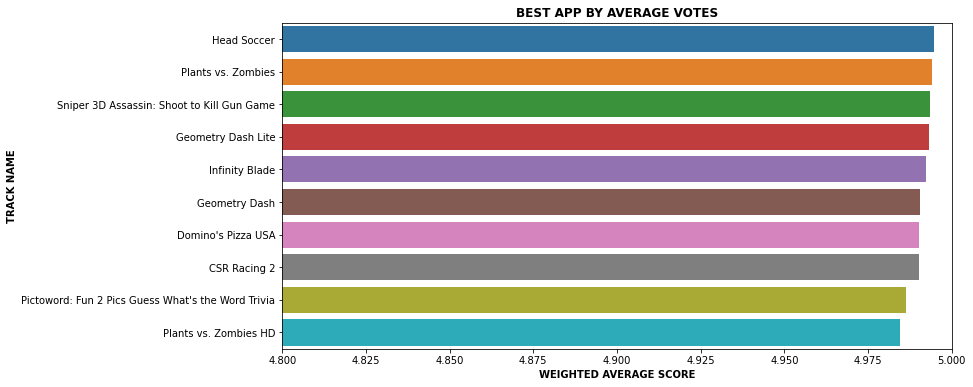

In [26]:
weight_average=Combine_AppleStore_df.sort_values('WEIGHTED AVERAGE',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['WEIGHTED AVERAGE'].head(10), y=weight_average['TRACK NAME'].head(10), data=weight_average)
plt.xlim(4.8, 5)
plt.title('BEST APP BY AVERAGE VOTES', weight='bold')
plt.xlabel('WEIGHTED AVERAGE SCORE', weight='bold')
plt.ylabel('TRACK NAME', weight='bold')
plt.savefig('best_app.png')

In [27]:
AppleStore_sorted_ranking1=Combine_AppleStore_df.sort_values('TOTAL VOTES',ascending=False)
AppleStore_sorted_ranking1[['TRACK NAME', 'TOTAL VOTES', 'RATING', 'WEIGHTED AVERAGE', 'PRICE']].head(20)

,TRACK NAME,TOTAL VOTES,RATING,WEIGHTED AVERAGE,PRICE
16,Facebook,2974676,3.5,3.500016,0.00
519,Instagram,2161558,4.5,4.499222,0.00
1346,Clash of Clans,2130805,4.5,4.499210,0.00
707,Temple Run,1724546,4.5,4.499025,0.00
7,Pandora - Music & Radio,1126879,4.0,3.999275,0.00
755,Pinterest,1061624,4.5,4.498417,0.00
4,Bible,985920,4.5,4.498295,0.00
1493,Candy Crush Saga,961794,4.5,4.498253,0.00
178,Spotify Music,878563,4.5,4.498087,0.00
275,Angry Birds,824451,4.5,4.497962,0.00


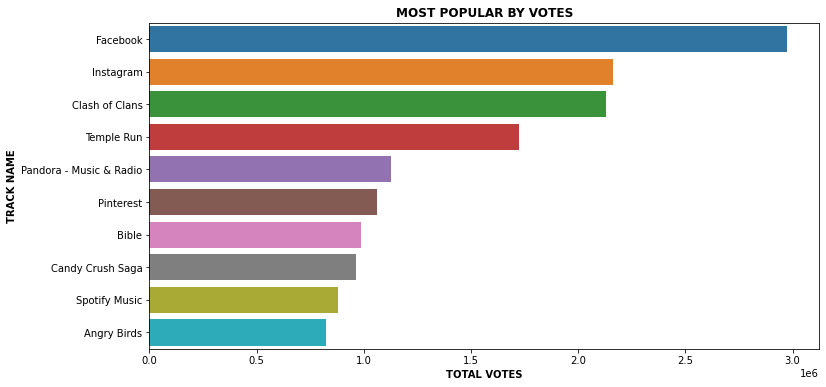

In [28]:

popularity=Combine_AppleStore_df.sort_values('TOTAL VOTES',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['TOTAL VOTES'].head(10), y=popularity['TRACK NAME'].head(10), data=popularity)

plt.title('MOST POPULAR BY VOTES', weight='bold')
plt.xlabel('TOTAL VOTES', weight='bold')
plt.ylabel('TRACK NAME', weight='bold')
plt.savefig('best_popular_app.png')

RECOMMENDATION BASED ON WEIGHTED AVERAGE AND TOTAL VOTES 

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
AppleStore_scaled_df=scaling.fit_transform(Combine_AppleStore_df[['WEIGHTED AVERAGE','TOTAL VOTES']])
AppleStore_normalized_df=pd.DataFrame(Combine_AppleStore_df,columns=['WEIGHTED AVERAGE','TOTAL VOTES'])
AppleStore_normalized_df.head()

,WEIGHTED AVERAGE,TOTAL VOTES
0,3.964445,21292
1,3.994972,161065
2,3.500245,188583
3,3.996899,262241
4,4.498295,985920


In [30]:
Combine_AppleStore_df[['normalized_weight_average','normalized_total_votes']]= AppleStore_normalized_df

In [31]:
Combine_AppleStore_df.head()

,Unnamed: 0,ID,TRACK NAME,SIZE,PRICE,TOTAL VOTES,RATING,VERSION,GENRE,DEVICE SUPPORTED,LANGUAGE SUPPORTED,DESCRIPTION,WEIGHTED AVERAGE,normalized_weight_average,normalized_total_votes
0,1,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,6.3.5,Games,38,10,"SAVE 20%, now only $3.99 for a limited time!\n...",3.964445,3.964445,21292
1,2,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,8.2.2,Productivity,37,23,Let Evernote change the way you organize your ...,3.994972,3.994972,161065
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,5.0.0,Weather,37,3,Download the most popular free weather app pow...,3.500245,3.500245,188583
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,5.10.0,Shopping,37,9,The eBay app is the best way to find anything ...,3.996899,3.996899,262241
4,5,282935706,Bible,92774400,0.00,985920,4.5,7.5.1,Reference,37,45,On more than 250 million devices around the wo...,4.498295,4.498295,985920


In [32]:
Combine_AppleStore_df['SCORE'] = Combine_AppleStore_df['normalized_weight_average'] * 0.5 + Combine_AppleStore_df['normalized_total_votes'] * 0.5
AppleStore_scored_df = Combine_AppleStore_df.sort_values(['SCORE'], ascending=False)
AppleStore_scored_df[['TRACK NAME', 'normalized_weight_average', 'normalized_total_votes', 'SCORE']].head(20)

,TRACK NAME,normalized_weight_average,normalized_total_votes,SCORE
16,Facebook,3.500016,2974676,1.487340e+06
519,Instagram,4.499222,2161558,1.080781e+06
1346,Clash of Clans,4.499210,2130805,1.065405e+06
707,Temple Run,4.499025,1724546,8.622752e+05
7,Pandora - Music & Radio,3.999275,1126879,5.634415e+05
755,Pinterest,4.498417,1061624,5.308142e+05
4,Bible,4.498295,985920,4.929622e+05
1493,Candy Crush Saga,4.498253,961794,4.808992e+05
178,Spotify Music,4.498087,878563,4.392837e+05
275,Angry Birds,4.497962,824451,4.122277e+05


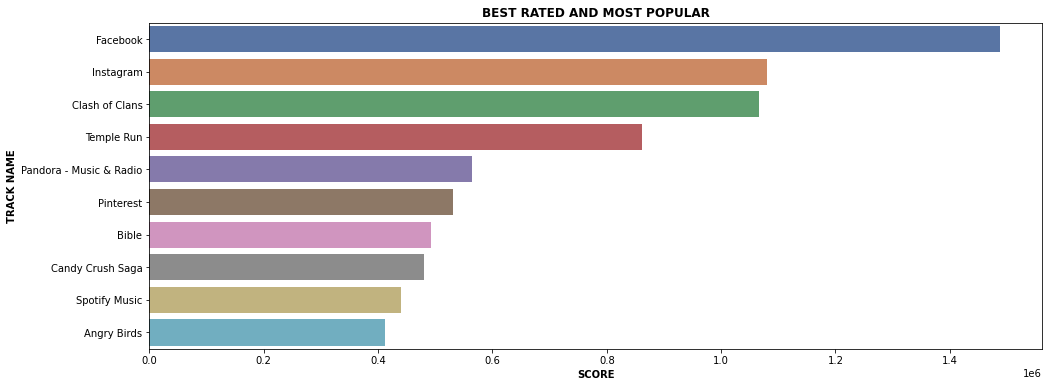

In [36]:
scored_df = Combine_AppleStore_df.sort_values('SCORE', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['SCORE'].head(10), y=scored_df['TRACK NAME'].head(10), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('BEST RATED AND MOST POPULAR', weight='bold')
plt.xlabel('SCORE', weight='bold')
plt.ylabel('TRACK NAME', weight='bold')

plt.savefig('scored_app.png')

CONTENT BASED RECOMMENDATION SYSTEM

In [37]:
Combine_AppleStore_df.head(1)['DESCRIPTION']

0    SAVE 20%, now only $3.99 for a limited time!\n...
Name: DESCRIPTION, dtype: object

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
Combine_AppleStore_df['DESCRIPTION'] = Combine_AppleStore_df['DESCRIPTION'].fillna('')

In [39]:
tfv_matrix = tfv.fit_transform(Combine_AppleStore_df['DESCRIPTION'])

In [40]:
tfv_matrix.shape

(7197, 87486)

In [41]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [42]:
indices = pd.Series(Combine_AppleStore_df.index, index=Combine_AppleStore_df['TRACK NAME']).drop_duplicates()

In [43]:
indices

TRACK NAME
PAC-MAN Premium                                          0
Evernote - stay organized                                1
WeatherBug - Local Weather, Radar, Maps, Alerts          2
eBay: Best App to Buy, Sell, Save! Online Shopping       3
Bible                                                    4
                                                      ... 
Kubik                                                 7192
VR Roller-Coaster                                     7193
Bret Michaels Emojis + Lyric Keyboard                 7194
VR Roller Coaster World - Virtual Reality             7195
Escape the Sweet Shop Series                          7196
Length: 7197, dtype: int64

In [44]:
def get_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return Combine_AppleStore_df['TRACK NAME'].iloc[movie_indices]

In [46]:
get_rec('Instagram')

3749     Moments - private albums with friends and family
689       PhotoSync – transfer and backup photos & videos
787                                              PicFrame
4570                          InsPad - Instagram for iPad
3334    Video Saver & Uploader-Save & Upload your Phot...
1428    Wireless Transfer App:Sync backup photo and video
1245                                            Flipagram
998          Secret Calculator Pro - Hide photos & videos
206     Camera Plus: For Macro Photos & Remote Photogr...
3414    Google Photos - unlimited photo and video storage
Name: TRACK NAME, dtype: object